In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle ## importing pickle used for dumping models


In [2]:
# nltk.download('stopwords')

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.stem.porter import PorterStemmer

In [5]:
df = pd.read_csv('spam_ham_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
print(df.shape)
print('\n')
print(df.ndim)
print('\n')
print(df.size)
print('\n')
print(df.isna().sum())
print('\n')
print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df.head())
print('\n')
print(df.tail())

(5171, 4)


2


20684


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 

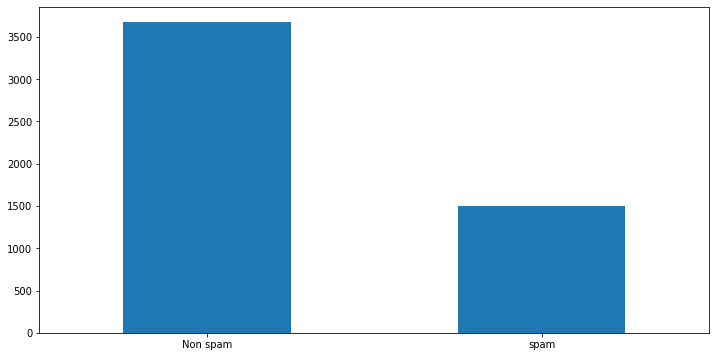

In [8]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0)
plt.show()

In [9]:
import re
corpus = []
length = len(df)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [11]:
y = df['label_num']

In [12]:
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
##train size 80% and test size 20%

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [15]:
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[716  16]
 [ 17 286]] 96.81159420289856


In [18]:
import pickle
pickle.dump(model, open("spam.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9681159420289855

In [20]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

In [21]:
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
  print("SPAM")
else :
  print("NOT SPAM")

Enter new review...good morning
NOT SPAM
